<a href="https://colab.research.google.com/github/k-ganda/alu-machine_learning/blob/main/Summative2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a linear regression model with multiple variables aiming to predict the insurance cost.
The variables:
**Age:** insurance contractor age, years

**Sex:** insurance contractor gender, *[female, male]*

**BMI:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally *18.5 to 24.9*

**Children:** number of children covered by health insurance / Number of dependents

**Smoker:** smoking, *[yes, no]*

**Region:** the beneficiary’s residential area in the US, *[northeast, southeast, southwest, northwest]*

**Charges:** Individual medical costs billed by health insurance, $ #predicted value

In [31]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Importing our dataset and displaying the first 5 rows
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
# Checking the general info of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [34]:
# Checking for missing values, 0 means we have no missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [35]:
# Check for any duplicate values and display the instance for validation
# Setting keep as false considers all of the same values as duplicates.
#setting keep as first considers first value unique and the rest as duplicates, last does the vice versa
data[data.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [36]:
# Dropping one of our rows so we don't have duplicates
data.drop_duplicates(inplace=True)

In [37]:
# Confirm if we still have duplicate values
data.duplicated().sum()

0

From reading the first 5 rows, we see that there are 3 categorical(non numerical) variables(sex, smoker, and region)

We therefore need to **convert them to numerical values** so we can use them in our model.

In [38]:
# We will set all categorical values to a numeric value like below:
num_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
# Let's make a copy of the data and replace the categorical variables to numeric
data_copy = data.copy()
data_copy.replace(num_data, inplace=True)
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [39]:
# Let's get the statistical description of our data
data_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.495138,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


How does each variable relate to each other? Using a **seaborn heatmap** to find relationship of features

Text(0.5, 1.0, 'Correlation of our data features')

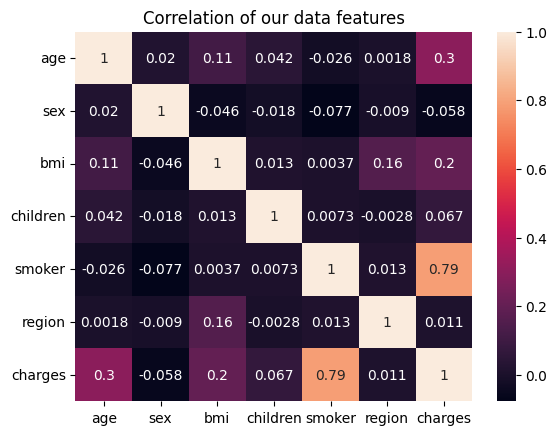

In [40]:
sns.heatmap(data_copy.corr(), annot=True)
plt.title('Correlation of our data features')

From the heatmap, we see that ***Smoker, BMI and Age*** have a strong correlation to charges and are important factors determining charges.

While *sex, children and region* have less correlation and minimal effect to charges.

<ipython-input-41-3198eeae2bd2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['age'])
<ipython-input-41-3198eeae2bd2>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['bmi'])
<ipython-input-41-3198eeae2bd2>:18: UserWarning: 

`distplot` is a deprecated function and will b

Text(0, 0.5, 'Count')

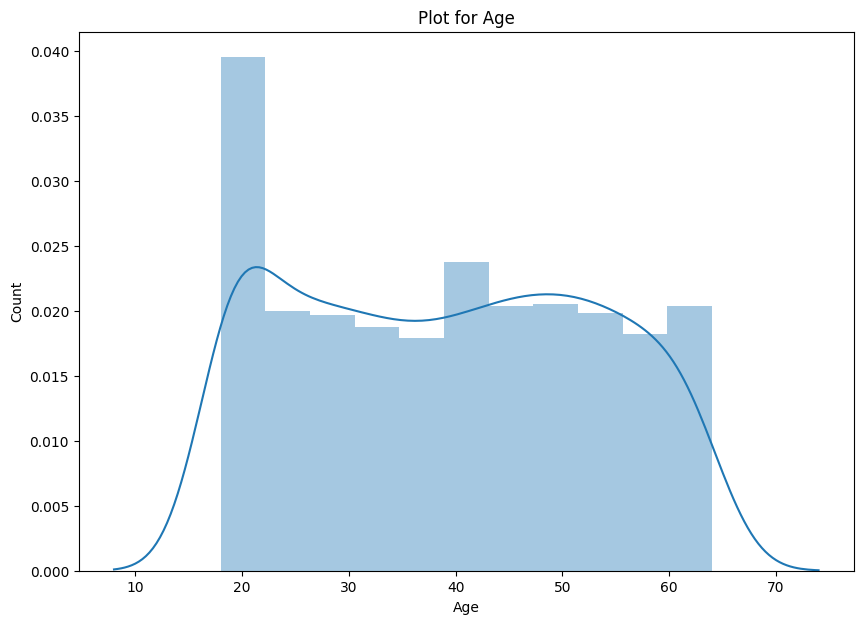

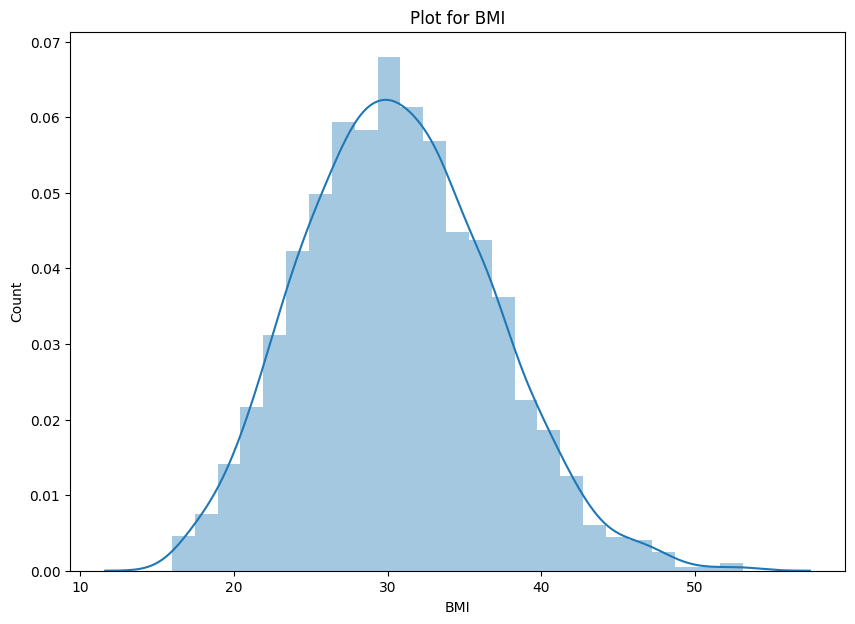

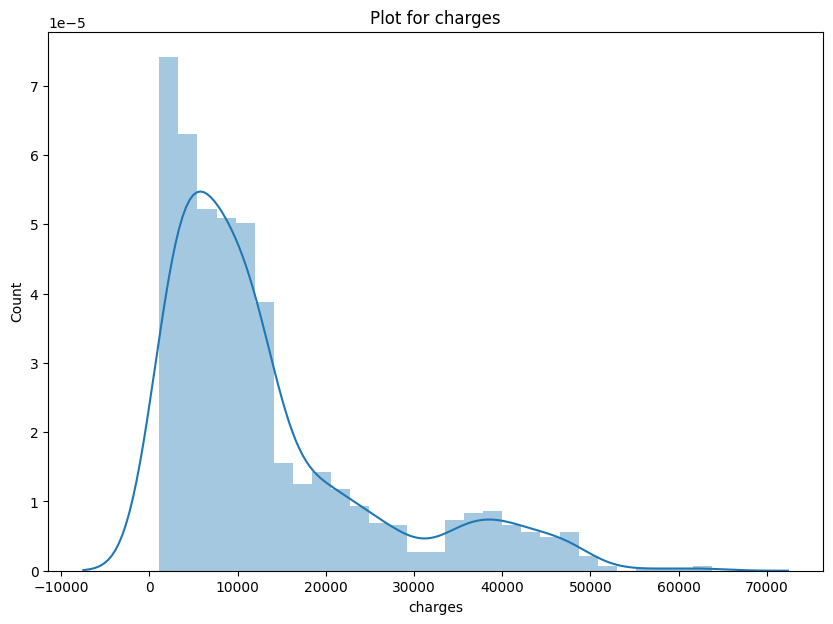

In [41]:
# Let's find out how each of our variables behave by looking at skewness
#AGE
plt.figure(figsize=(10,7))
sns.distplot(data_copy['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

#BMI
plt.figure(figsize=(10,7))
sns.distplot(data_copy['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

#CHARGES
plt.figure(figsize=(10,7))
sns.distplot(data_copy['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

There are **outliers** in BMI and charges that may affect the productivity of our model.

In charges from the distplot, the graph is skewed on the right side, imdicating presence of outliers(Very high charges)

For BMI, we can also see signs of outliers.

In [42]:
# Calculate the IQR for 'charges'
Q1 = data_copy['charges'].quantile(0.25)
Q3 = data_copy['charges'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data_copy[(data_copy['charges'] < lower_bound) | (data_copy['charges'] > upper_bound)]
print(outliers)

      age  sex     bmi  children  smoker  region      charges
14     27    0  42.130         0       1       2  39611.75770
19     30    0  35.300         0       1       3  36837.46700
23     34    1  31.920         1       1       1  37701.87680
29     31    0  36.300         2       1       3  38711.00000
30     22    0  35.600         0       1       3  35585.57600
...   ...  ...     ...       ...     ...     ...          ...
1300   45    0  30.360         0       1       2  62592.87309
1301   62    0  30.875         3       1       0  46718.16325
1303   43    0  27.800         0       1       3  37829.72420
1313   19    1  34.700         2       1       3  36397.57600
1323   42    1  40.370         2       1       2  43896.37630

[139 rows x 7 columns]


In [43]:
# Calculate the IQR for 'bmi'
Q1 = data_copy['bmi'].quantile(0.25)
Q3 = data_copy['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data_copy[(data_copy['bmi'] < lower_bound) | (data_copy['bmi'] > upper_bound)]
print(outliers)

      age  sex    bmi  children  smoker  region      charges
116    58    0  49.06         0       0       2  11381.32540
286    46    1  48.07         2       0       1   9432.92530
401    47    0  47.52         1       0       2   8083.91980
543    54    1  47.41         0       1       2  63770.42801
847    23    0  50.38         1       0       2   2438.05520
860    37    1  47.60         2       1       3  46113.51100
1047   22    0  52.58         1       1       2  44501.39820
1088   52    0  47.74         1       0       2   9748.91060
1317   18    0  53.13         0       0       2   1163.46270


# We will scale both BMI and charges column before we can proceed with our prediction

In [49]:
# Standardize the 'bmi' and 'charges' columns
from sklearn.preprocessing import StandardScaler
scaler_bmi = StandardScaler()
scaler_charges = StandardScaler()

data_copy['bmi'] = scaler_bmi.fit_transform(data_copy[['bmi']])
data_copy['charges'] = scaler_charges.fit_transform(data_copy[['charges']])

# Display first few rows of the scaled data
print(data_copy.head())

   age  sex       bmi  children  smoker  region   charges
0   19    1 -0.453160         0       1       3  0.297857
1   18    0  0.509422         1       0       2 -0.954381
2   28    0  0.383155         3       0       2 -0.729373
3   33    0 -1.305052         0       0       0  0.719104
4   32    0 -0.292456         0       0       0 -0.777499


In [50]:
# Defining our features and target variable
X = data_copy.drop('charges', axis=1)
y = data_copy['charges']

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit the scaler to the data
X_scaled = scaler.fit_transform(X)
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,-0.453160,0,1,3,0.297857
1,18,0,0.509422,1,0,2,-0.954381
2,28,0,0.383155,3,0,2,-0.729373
3,33,0,-1.305052,0,0,0,0.719104
4,32,0,-0.292456,0,0,0,-0.777499


In [54]:
# SPlitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1069, 6), (268, 6), (1069,), (268,))

In [55]:
# Building the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
# Based on our model, let's determine the accuracy, and make predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions in the model
y_pred = model.predict(X_test)

#Calculate the RMSE
rmse =  mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Square Error:", rmse)

# Determining the accuracy of our model
accuracy = r2_score(y_test, y_pred)*100
print("Accuracy:", accuracy)

Root Mean Square Error: 0.4930739265510754
Accuracy: 80.61028038524822


Let's make predictions with an example

In [61]:
# Example: Making predictions with new data points
new_data = pd.DataFrame({
    'age': [40, 25],
    'sex': [0, 1],  # male, female
    'bmi': [25.0, 22.0],
    'children': [2, 0],
    'smoker': [0, 1],  # no, yes
    'region': [3, 2]  # southwest, southeast
})

# Standardize the new data's 'bmi' values
new_data['bmi'] = scaler_bmi.transform(new_data[['bmi']])

# Make predictions for the new data points
new_predictions = model.predict(new_data)

# Inverse transform the standardized predictions back to their original scale
#reshape(-1, 1) reshapes numpy array into column vector -1(calculate no of rows based on original array)
# 1- columns
new_predictions = scaler_charges.inverse_transform(new_predictions.reshape(-1, 1))
new_predictions

array([[ 7104.40164544],
       [24690.28334905]])

**Saving our model**

In [62]:
import pickle
import joblib

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

#Saving scalers using joblib
joblib.dump(scaler_bmi, 'scaler_bmi.pkl')
joblib.dump(scaler_charges, 'scaler_charges.pkl')

['scaler_charges.pkl']